# PART 1

In [ ]:
# Import Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Import the Nigerian Pidgin Tweets Sentiments data
df = pd.read_csv('/content/14000 Nigerian Pidgin Tweets and Sentiments.csv')
df.head()

,Clean_Content,Human_Label
0,we don realize hin importance after that city ...,positive
1,dem don nominate and second senator ovie omoag...,neutral
2,don come give una free awoof ...awoof!!! o .. ...,positive
3,coronavirus update: washing your hands with so...,neutral
4,"people dey talk about iniesta, paul scholes, p...",positive


In [ ]:
# Chick the infomation of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Clean_Content  14000 non-null  object
 1   Human_Label    14000 non-null  object
dtypes: object(2)
memory usage: 218.9+ KB


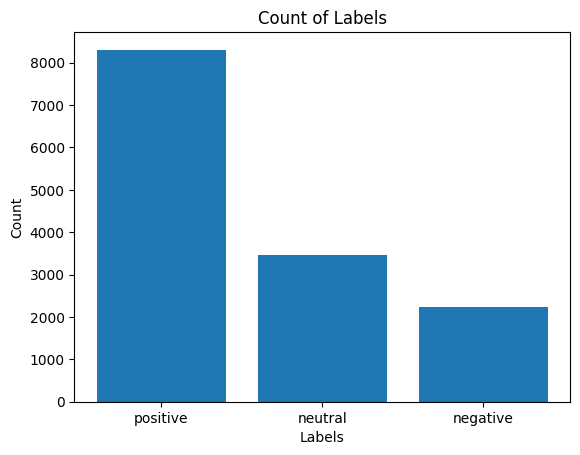

In [ ]:
# Counting the labels
label_counts = df['Human_Label'].value_counts()

# Creating the bar plot
plt.bar(label_counts.index, label_counts.values)

# Adding labels and title
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Count of Labels')

# Displaying the plot
plt.show()

In [ ]:
# Dropping rows with the label 'neutral'
df = df[df['Human_Label'] != 'neutral']

# Printing the updated DataFrame
df.head()

,Clean_Content,Human_Label
0,we don realize hin importance after that city ...,positive
2,don come give una free awoof ...awoof!!! o .. ...,positive
4,"people dey talk about iniesta, paul scholes, p...",positive
5,election latest,positive
6,ht: 1 v leicester city 0. thank god for mason ...,positive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10547 entries, 0 to 13999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Clean_Content  10547 non-null  object
 1   Human_Label    10547 non-null  object
dtypes: object(2)
memory usage: 247.2+ KB


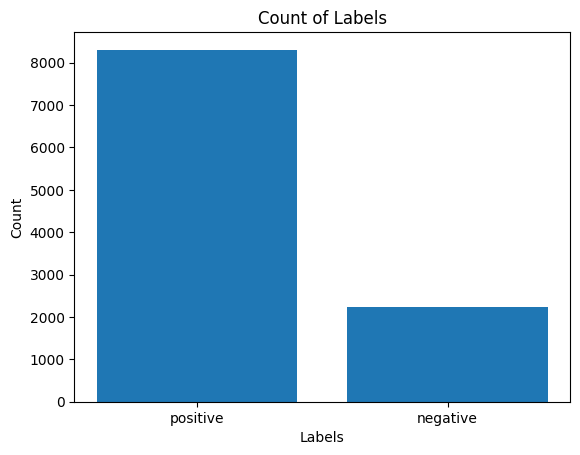

In [ ]:
# Counting the labels
label_counts = df['Human_Label'].value_counts()

# Creating the bar plot
plt.bar(label_counts.index, label_counts.values)

# Adding labels and title
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Count of Labels')

# Displaying the plot
plt.show()

In [ ]:
# Encoding the labels
label_mapping = {'negative': 0, 'positive': 1}
df['Label'] = df['Human_Label'].map(label_mapping)

# Printing the updated DataFrame
df.head()

,Clean_Content,Human_Label,Label
0,we don realize hin importance after that city ...,positive,1
2,don come give una free awoof ...awoof!!! o .. ...,positive,1
4,"people dey talk about iniesta, paul scholes, p...",positive,1
5,election latest,positive,1
6,ht: 1 v leicester city 0. thank god for mason ...,positive,1


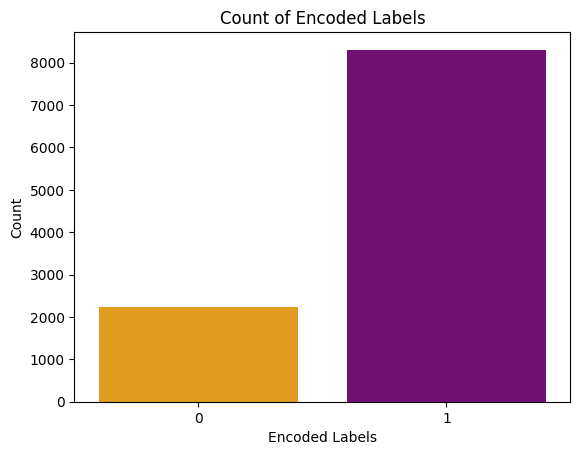

In [ ]:
# Defining colors for the bars
colors = ['orange', 'purple']

# Creating the count plot with colored bars
sns.countplot(data=df, x='Label', palette=colors)

# Adding labels and title
plt.xlabel('Encoded Labels')
plt.ylabel('Count')
plt.title('Count of Encoded Labels')

# Displaying the plot
plt.show()


In [ ]:
# Dropping the 'Human_Label' column
df = df.drop('Human_Label', axis=1)

# Printing the updated DataFrame
df.head()

,Clean_Content,Label
0,we don realize hin importance after that city ...,1
2,don come give una free awoof ...awoof!!! o .. ...,1
4,"people dey talk about iniesta, paul scholes, p...",1
5,election latest,1
6,ht: 1 v leicester city 0. thank god for mason ...,1


In [ ]:
# Save the DataFrame as a CSV file
df.to_csv('Sarcasm.csv', index=False)

# PART 2

# Load and preprocess the data

In [52]:
import pandas as pd
import numpy as np
import re
import nltk
import seaborn as sns
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

In [ ]:

data = pd.read_csv('/content/Sarcasm.csv')
data.head(10)

,Clean_Content,Label
0,we don realize hin importance after that city ...,1
1,don come give una free awoof ...awoof!!! o .. ...,1
2,"people dey talk about iniesta, paul scholes, p...",1
3,election latest,1
4,ht: 1 v leicester city 0. thank god for mason ...,1
5,sabi pikin pellegrini epp italo close shop yes...,1
6,which full-back is better? for luke shaw like...,1
7,we dey wish hapi baidae as him turn 25 years ...,1
8,"on dis day for 1927, tanda as official club fo...",1
9,we dey live dey torchlight how pipo and dey p...,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10547 entries, 0 to 10546
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Clean_Content  10547 non-null  object
 1   Label          10547 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 164.9+ KB


In [ ]:
import re
import nltk
from nltk.stem import WordNetLemmatizer

# Importing the necessary NLTK resources
nltk.download('punkt')
nltk.download('wordnet')

# Define the preprocess_pidgin_data function
def preprocess_pidgin_data(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenize the text
    tokens = nltk.word_tokenize(text)

    # Defining custom list of Pidgin stopwords
    stop_words = ['na', 'i', 'am', 'we', 'dem', 'una', 'im', 'for', 'of', 'to', 'and', 'an', 'as', 'e', 'she', 'he',
    'you', 'them', 'my', 'your', 'his', 'her', 'our', 'their', 'make', 'go', 'come', 'see', 'get',
    'no', 'not', 'yes', 'so', 'but', 'if', 'when', 'where', 'why', 'who', 'what', 'which', 'how', 'many',
    'much', 'some', 'any', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten']

    pidgin_stopwords = stop_words

    # Remove stop words
    tokens = [token for token in tokens if token not in pidgin_stopwords]

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join the tokens back into a single string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

preprocessed_text = data['Clean_Content'].apply(preprocess_pidgin_data)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Split the dataset

In [ ]:
# SPlitting dataset to Train and Test set
X_train, X_test, y_train, y_test = train_test_split(preprocessed_text, data['Label'],
                                                    test_size=0.2, random_state=42)


# Feature extraction

In [ ]:
# Extracting the features of the dataset

"""
vectorizer = TfidfVectorizer()
X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)
"""

# Applying Count Vectorizer

In [ ]:
# Apply CountVectorizer for feature extraction
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

#Applying SMOTE

In [ ]:
# Apply SMOTE to balance the dataset on the TF-IDF features
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_counts, y_train)

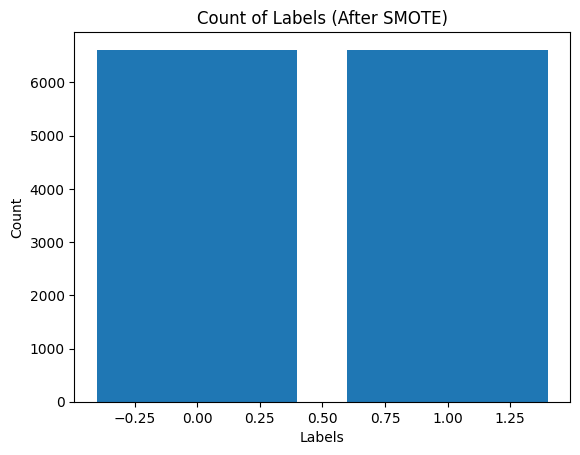

In [ ]:
label_counts_resampled = pd.Series(y_train_resampled).value_counts()

plt.bar(label_counts_resampled.index, label_counts_resampled.values)
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Count of Labels (After SMOTE)')
plt.show()


# Train and evaluate different models

In [37]:
# Logistic Regression
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_resampled, y_train_resampled)
y_pred_logreg = logreg.predict(X_test_counts)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)
rf_classifier.fit(X_train_resampled, y_train_resampled)
y_pred_rf = logreg.predict(X_test_counts)


In [39]:
# XGBoost
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)
y_pred_xgb = xgb_model.predict(X_test_counts)


In [40]:
# Vanilla ANN
ann_model = MLPClassifier(random_state=42)
ann_model.fit(X_train_resampled, y_train_resampled)
y_pred_ann = ann_model.predict(X_test_counts)

# Evaluate the model

In [41]:
# Evaluate models
for model_name, y_pred in zip(['Logistic Regression', 'Random Forest', 'XGBoost', 'Vanilla ANN'],
                               [y_pred_logreg, y_pred_rf, y_pred_xgb, y_pred_ann]):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")
    print()


Model: Logistic Regression
Accuracy: 0.8213270142180095
Precision: 0.9367930805056554
Recall: 0.8331360946745562
F1-score: 0.8819292201691199

Model: Random Forest
Accuracy: 0.8213270142180095
Precision: 0.9367930805056554
Recall: 0.8331360946745562
F1-score: 0.8819292201691199

Model: XGBoost
Accuracy: 0.8578199052132701
Precision: 0.8856825749167592
Recall: 0.9443786982248521
F1-score: 0.9140893470790378

Model: Vanilla ANN
Accuracy: 0.8317535545023697
Precision: 0.9238095238095239
Recall: 0.8609467455621301
F1-score: 0.891271056661562



In [42]:
# Confusion matrix for Logistic Regression
cm_logreg = confusion_matrix(y_test, y_pred_logreg)

# Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Confusion matrix for XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Confusion matrix for Vanilla ANN
cm_ann = confusion_matrix(y_test, y_pred_ann)

# Print confusion matrices
print("Confusion Matrix for Logistic Regression:")
print(cm_logreg)

print("\nConfusion Matrix for Random Forest:")
print(cm_rf)

print("\nConfusion Matrix for XGBoost:")
print(cm_xgb)

print("\nConfusion Matrix for Vanilla ANN:")
print(cm_ann)

Confusion Matrix for Logistic Regression:
[[ 325   95]
 [ 282 1408]]

Confusion Matrix for Random Forest:
[[ 325   95]
 [ 282 1408]]

Confusion Matrix for XGBoost:
[[ 214  206]
 [  94 1596]]

Confusion Matrix for Vanilla ANN:
[[ 300  120]
 [ 235 1455]]


<Axes: >

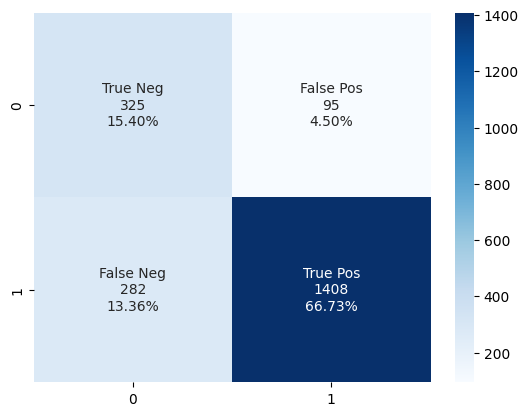

In [44]:
# Confusion matrix for Logistic Regression

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm_logreg.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm_logreg.flatten() / np.sum(cm_logreg)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
sns.heatmap(cm_logreg, annot=labels, fmt='', cmap='Blues')

<Axes: >

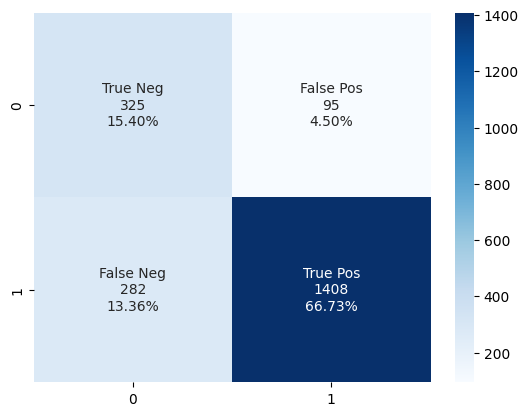

In [43]:
# Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm_rf.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm_rf.flatten() / np.sum(cm_rf)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
sns.heatmap(cm_rf, annot=labels, fmt='', cmap='Blues')

<Axes: >

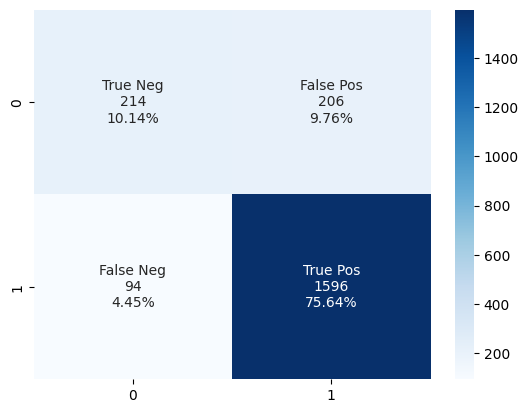

In [45]:
# Confusion matrix for XGBoost

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm_xgb.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm_xgb.flatten() / np.sum(cm_xgb)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
sns.heatmap(cm_xgb, annot=labels, fmt='', cmap='Blues')

<Axes: >

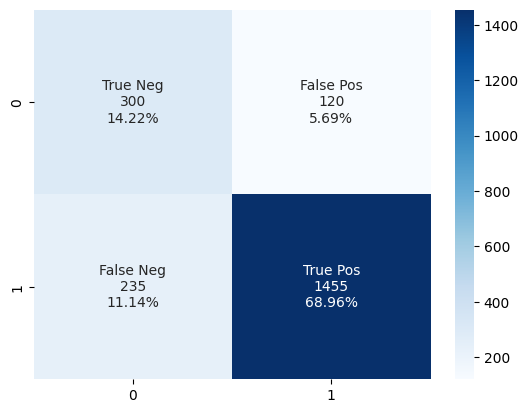

In [46]:
# Confusion matrix for Logistic Regression

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm_ann.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm_ann.flatten() / np.sum(cm_ann)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
sns.heatmap(cm_ann, annot=labels, fmt='', cmap='Blues')

# ROC Code

In [48]:
# Logistic Regression
y_score_logreg = logreg.predict_proba(X_test_counts)[:, 1]
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_score_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

# Random Forest
y_score_rf = rf_classifier.predict_proba(X_test_counts)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_score_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# XGBoost
y_score_xgb = xgb_model.predict_proba(X_test_counts)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_score_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Vanilla ANN
y_score_ann = ann_model.predict_proba(X_test_counts)[:, 1]
fpr_ann, tpr_ann, _ = roc_curve(y_test, y_score_ann)
roc_auc_ann = auc(fpr_ann, tpr_ann)


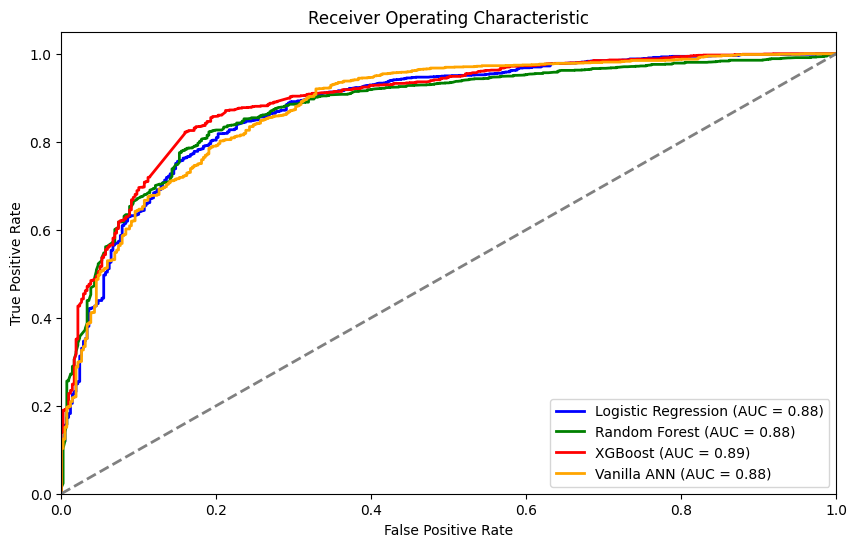

In [49]:
# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_logreg, tpr_logreg, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_logreg)
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot(fpr_xgb, tpr_xgb, color='red', lw=2, label='XGBoost (AUC = %0.2f)' % roc_auc_xgb)
plt.plot(fpr_ann, tpr_ann, color='orange', lw=2, label='Vanilla ANN (AUC = %0.2f)' % roc_auc_ann)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Hyperparamter Tuning

In [50]:
# Define parameter grids for each model
param_grid_logreg = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001]
}

param_grid_ann = {
    'hidden_layer_sizes': [(100,), (50, 50), (50, 25, 10)],
    'activation': ['relu', 'logistic'],
    'alpha': [0.0001, 0.001, 0.01]
}


# Train and evaluate models with hyperparameter tuning using GridSearchCV

In [53]:
# Logistic Regression
grid_logreg = GridSearchCV(LogisticRegression(random_state=42), param_grid_logreg, cv=3, scoring='roc_auc')
grid_logreg.fit(X_train_resampled, y_train_resampled)
best_logreg = grid_logreg.best_estimator_
y_pred_logreg = best_logreg.predict(X_test_counts)

# Random Forest
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3, scoring='roc_auc')
grid_rf.fit(X_train_resampled, y_train_resampled)
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test_counts)

# XGBoost
grid_xgb = GridSearchCV(XGBClassifier(random_state=42), param_grid_xgb, cv=3, scoring='roc_auc')
grid_xgb.fit(X_train_resampled, y_train_resampled)
best_xgb = grid_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test_counts)

# Vanilla ANN
grid_ann = GridSearchCV(MLPClassifier(random_state=42), param_grid_ann, cv=3, scoring='roc_auc')
grid_ann.fit(X_train_resampled, y_train_resampled)
best_ann = grid_ann.best_estimator_
y_pred_ann = best_ann.predict(X_test_counts)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [54]:
# Evaluate models
for model_name, y_pred in zip(['Logistic Regression', 'Random Forest', 'XGBoost', 'Vanilla ANN'],
                               [y_pred_logreg, y_pred_rf, y_pred_xgb, y_pred_ann]):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")
    print()

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    print()


Model: Logistic Regression
Accuracy: 0.8213270142180095
Precision: 0.9367930805056554
Recall: 0.8331360946745562
F1-score: 0.8819292201691199

Confusion Matrix:
[[ 325   95]
 [ 282 1408]]

Model: Random Forest
Accuracy: 0.8388625592417062
Precision: 0.9315856777493606
Recall: 0.8621301775147929
F1-score: 0.8955132145052245

Confusion Matrix:
[[ 313  107]
 [ 233 1457]]

Model: XGBoost
Accuracy: 0.8635071090047394
Precision: 0.8851648351648351
Recall: 0.9532544378698224
F1-score: 0.9179487179487179

Confusion Matrix:
[[ 211  209]
 [  79 1611]]

Model: Vanilla ANN
Accuracy: 0.8440758293838863
Precision: 0.9287964713295526
Recall: 0.8721893491124261
F1-score: 0.8996032956972841

Confusion Matrix:
[[ 307  113]
 [ 216 1474]]



In [59]:
# Logistic Regression
y_score_logreg = best_logreg.predict_proba(X_test_counts)[:, 1]
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_score_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

# Random Forest
y_score_rf = best_rf.predict_proba(X_test_counts)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_score_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# XGBoost
y_score_xgb = best_xgb.predict_proba(X_test_counts)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_score_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Vanilla ANN
y_score_ann = best_ann.predict_proba(X_test_counts)[:, 1]
fpr_ann, tpr_ann, _ = roc_curve(y_test, y_score_ann)
roc_auc_ann = auc(fpr_ann, tpr_ann)


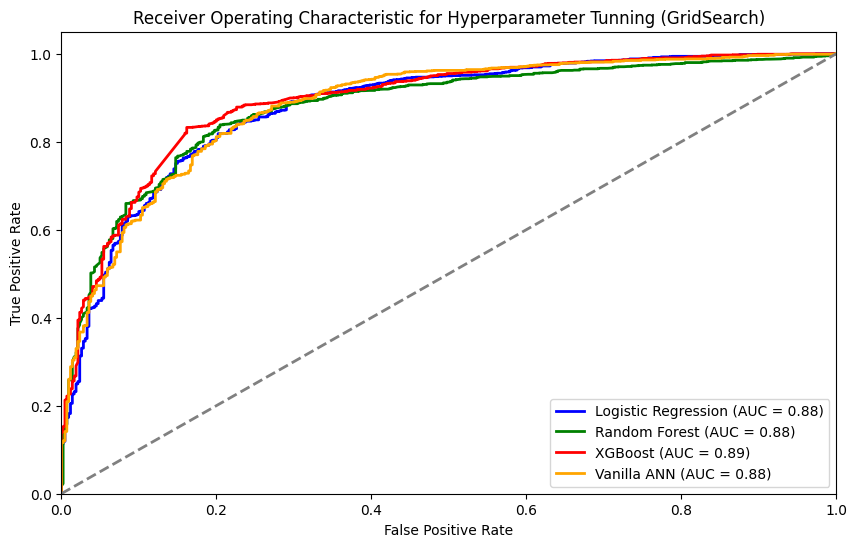

In [60]:
# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_logreg, tpr_logreg, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_logreg)
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot(fpr_xgb, tpr_xgb, color='red', lw=2, label='XGBoost (AUC = %0.2f)' % roc_auc_xgb)
plt.plot(fpr_ann, tpr_ann, color='orange', lw=2, label='Vanilla ANN (AUC = %0.2f)' % roc_auc_ann)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Hyperparameter Tunning (GridSearch)')
plt.legend(loc='lower right')
plt.show()